In [22]:
import matplotlib.pyplot as plt
import csv
import json
import numpy as np

In [23]:
def preprocess(file_name):
    results = []
    with open(file_name) as csvfile:
        wine_reader = csv.reader(csvfile, dialect="excel", delimiter=';')
        for row in wine_reader:
            results.append(row)
    name_features = results[0]
    #print(name_features)
    parsed_results = []
    for row in results[1:]:
        new_row = []
        for num in row:
            new_row.append(float(num))
        parsed_results.append(new_row)
    parsed_results = np.array(parsed_results)
    n_instances = parsed_results.shape[0]
    n_features = parsed_results.shape[1] - 1
    labels = parsed_results[:, n_features]
    instances = parsed_results[:, : n_features]
    return instances, labels
white_instances, white_labels = preprocess('winequality-white.csv')
red_instances, red_labels = preprocess('winequality-red.csv')

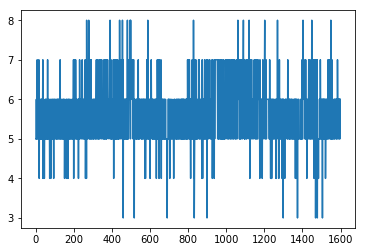

In [27]:
plt.plot(red_labels)
plt.show()

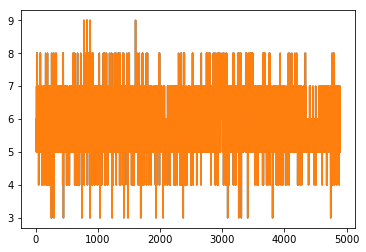

In [29]:
plt.plot(white_labels)
plt.show()